In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [2]:
# Carregar o conjunto de dados e exibir os 5 primeiros registros
df = pd.read_csv('dataset.csv')
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [3]:
# Descrição do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Data          365 non-null    object 
 1   Total_Vendas  365 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


In [4]:
# ver se realmente não há valores ausentes
df.isna().sum()

Data            0
Total_Vendas    0
dtype: int64

In [5]:
# Resumo estatístico
df.describe()

,Total_Vendas
count,365.000000
mean,59.152472
std,10.056436
min,33.265284
25%,51.496725
50%,59.165362
75%,66.610772
max,84.430251


Pré-processamento dos dados

In [6]:
# Valor mínimo da coluna data
df['Data'].min()

'2023-01-01'

In [7]:
# Valor máximo da coluna data
df['Data'].max()

'2023-12-31'

In [8]:
# Converter a coluna data no tipo datetime
df['Data'] = pd.to_datetime(df['Data'])

In [9]:
df.head()

,Data,Total_Vendas
0,2023-01-01,53.483571
1,2023-01-02,57.176993
2,2023-01-03,63.087722
3,2023-01-04,62.103987
4,2023-01-05,44.690396


In [10]:
# Tipos de dados das colunas
df.dtypes

Data            datetime64[ns]
Total_Vendas           float64
dtype: object

In [11]:
# Converter o DataFrame em uma série temporal com a data como índice
serie_temporal = df.set_index('Data')['Total_Vendas']

In [12]:
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Name: Total_Vendas, Length: 365, dtype: float64

In [13]:
# Fornece a frequência da série temporal (diária, neste caso)
serie_temporal = serie_temporal.asfreq('D')
serie_temporal

Data
2023-01-01    53.483571
2023-01-02    57.176993
2023-01-03    63.087722
2023-01-04    62.103987
2023-01-05    44.690396
                ...    
2023-12-27    74.935570
2023-12-28    71.374857
2023-12-29    57.806920
2023-12-30    62.340244
2023-12-31    71.650720
Freq: D, Name: Total_Vendas, Length: 365, dtype: float64

Análise Exploratória

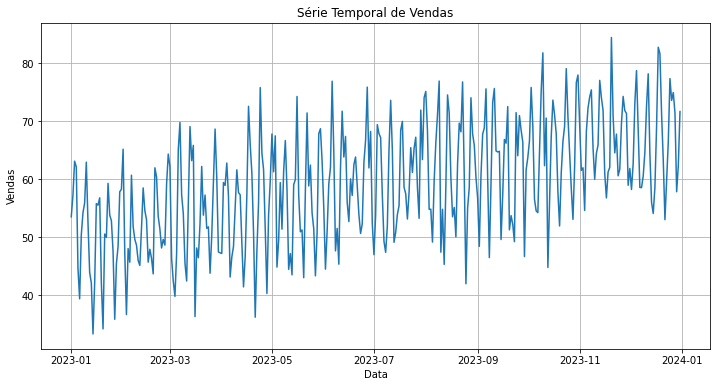

In [14]:
# Cria o gráfico da série temporal (sem formatação)
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal)
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Série Temporal de Vendas')
plt.grid(True)
plt.show();

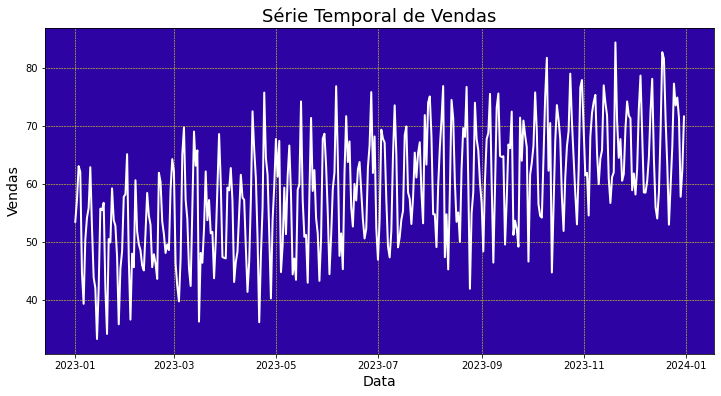

In [19]:
# Cria o gráfico com formatação

# Criar o gráfico da série temporal cm layout de contraste
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, color='white', linewidth=2)

# Confirurar cores e estilo do gráfico
plt.gca().set_facecolor('#2e03a3')
plt.grid(color='yellow', linestyle='--', linewidth=0.5)

# Configurar rótulos dos eixos, título e legenda
plt.xlabel('Data', color='black', fontsize=14)
plt.ylabel('Vendas', color='black', fontsize=14)
plt.title('Série Temporal de Vendas', color='black', fontsize=18)

# Configurar as cores dos eixos e dos ticks (marcadores)
plt.tick_params(axis='x', colors='black')
plt.tick_params(axis='y', colors='black')

plt.show()


#### Suvização Exponencial
Técnica de análise e previsão de séries temporais que aplica médias ponderadas aos dados históricos, onde os pesos diminuem exponencialmente à medida que os dados ficam mais antigos. É útil para lidar com tendências e sazonalidades nos dados e para reduzir o ruído

In [20]:
# Cria o modelo
modelo = SimpleExpSmoothing(serie_temporal)

In [21]:
# Treinamento do modelo
modelo_ajustado = modelo.fit(smoothing_level = 0.2)

In [22]:
# Extrai os valores previstos pelo modelo
suavizacao_exponencial = modelo_ajustado.fittedvalues

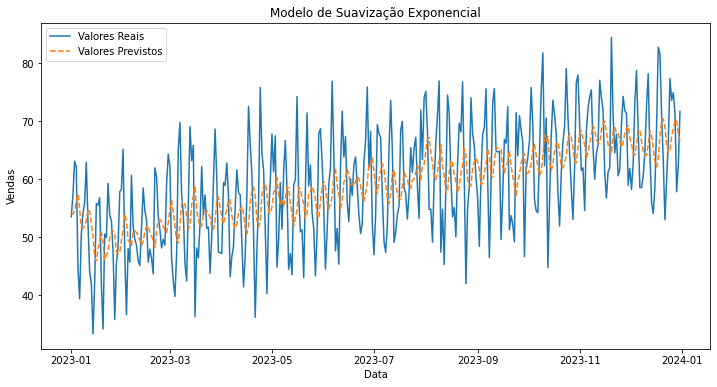

In [23]:
# Plot
plt.figure(figsize=(12, 6))
plt.plot(serie_temporal, label='Valores Reais')
plt.plot(suavizacao_exponencial, label='Valores Previstos', linestyle='--')
plt.xlabel('Data')
plt.ylabel('Vendas')
plt.title('Modelo de Suavização Exponencial')
plt.legend()
plt.show()

Deploy e Previsão com o modelo treinado

In [24]:
# Fazer previsões
num_previsoes = 1
previsoes = modelo_ajustado.forecast(steps = num_previsoes)

In [26]:
print(f'Previsão do Total de Vendas para Janeiro/2024: {round(previsoes[0], 4)}')

Previsão do Total de Vendas para Janeiro/2024: 67.6499
